# Segmentación con kmedias

Usaremos datos tomados del proyecto de kaggle *Credit Card Dataset for Clustering*:

In [1]:
%autosave 0
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import numpy as np
# leer datos 
general = pd.read_csv("../datos/CC-GENERAL.csv")
general.info()

Autosave disabled
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PA

Datos tomados de [kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata). Las variables ya tienen algo de procesamiento previo. Podemos crear también nuevas variables que consideremos puedan ser informativas para hacer los segmentos.

- CUST_ID : Identification of Credit Card holder (Categorical) 
- BALANCE : Balance amount left in their account to make purchases  
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 
- PURCHASES : Amount of purchases made from account 
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment 
- CASH_ADVANCE : Cash in advance given by the user 
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) 
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid 
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" 
- PURCHASES_TRX : Numbe of purchase transactions made 
- CREDIT_LIMIT : Limit of Credit Card for user 
- PAYMENTS : Amount of Payment done by user 
- MINIMUM_PAYMENTS : Minimum amount of payments made by user 
- PRCFULLPAYMENT : Percent of full payment paid by user 
- TENURE : Tenure of credit card service for user

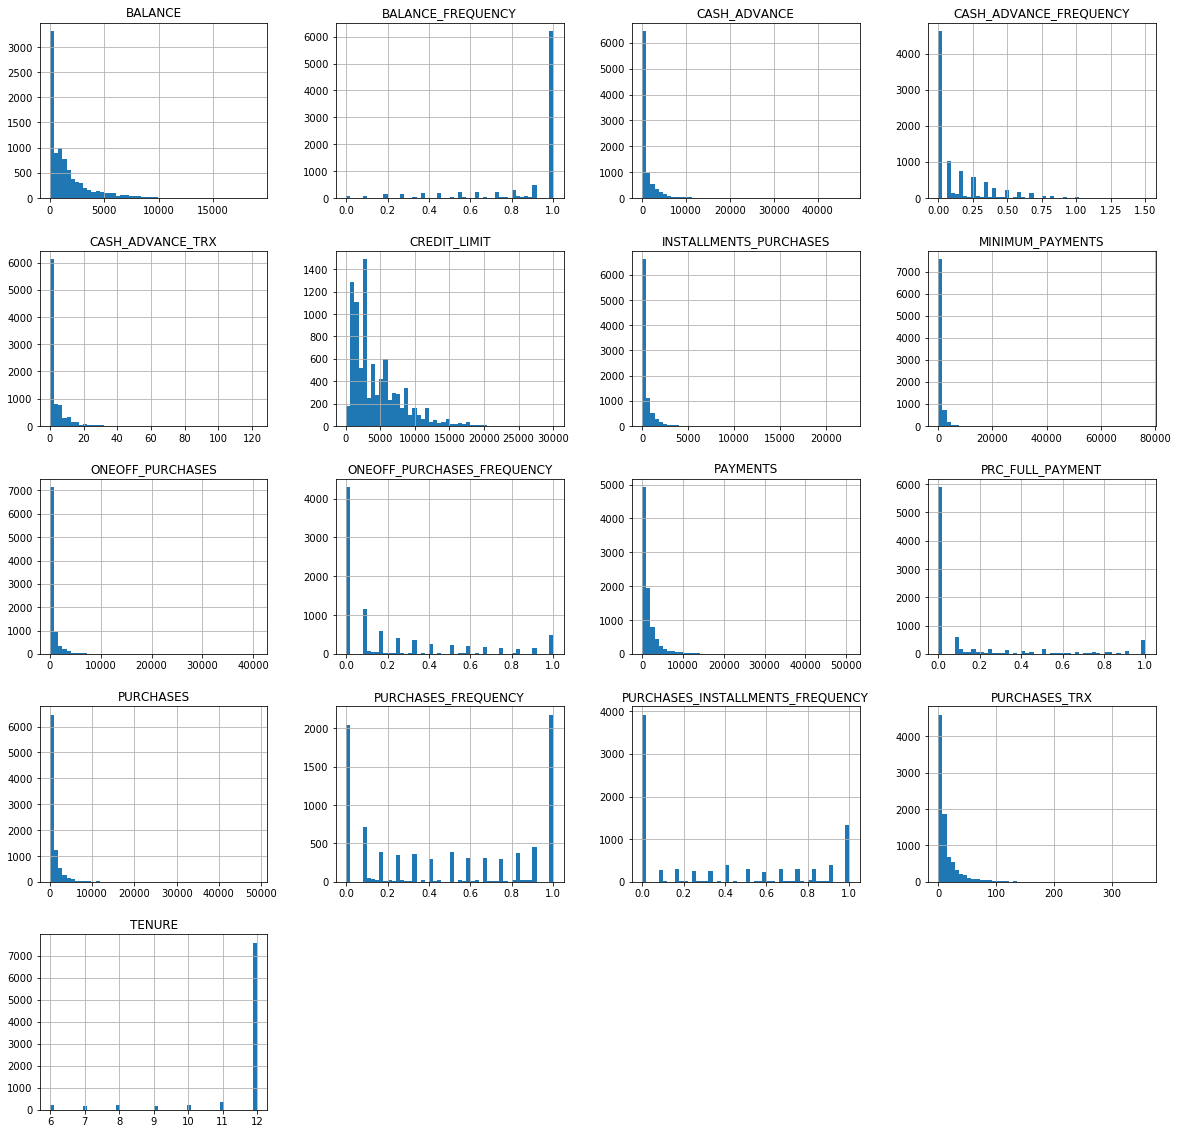

In [2]:
general.hist(figsize=(20, 20), bins = 50)
plt.show()


## 1. Preprocesamiento

In [3]:
# ponemos en minúsculas las variables y calculamos resúmenes:
general.columns = [x.lower() for x in general.columns.tolist()]
general.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
#faltantes
general.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [5]:
print(pd.crosstab(general["minimum_payments"].isnull(), general["payments"] > 0))
# rellenar con 0 en minimum payments
general['minimum_payments'].fillna(value = 0, inplace = True)
# eliminar caso sin limite de cŕedito
general.dropna(axis = 0, inplace = True)

payments          False  True 
minimum_payments              
False                 0   8637
True                240     73


In [6]:
general.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,834.075035,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2336.104378,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,163.029483,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,289.686899,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Los datos presentan asimetría y colas largas. Puede ser una buena idea transformar a logaritmo las variables positivas. Esto implica que nos interesan diferencias entre los casos **multiplicativas** en lugar de **aditivas**, que es más apropiado aquí.

In [7]:
vars_pos = ["balance", "purchases", "oneoff_purchases", "installments_purchases", "cash_advance", "cash_advance_trx",
          "purchases_trx", "credit_limit", "payments", "minimum_payments"]
general_trans = general.copy()
for var in vars_pos:
    general_trans[var + "_log"] = np.log10(1 + general_trans[var])
general_trans

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,...,balance_log,purchases_log,oneoff_purchases_log,installments_purchases_log,cash_advance_log,cash_advance_trx_log,purchases_trx_log,credit_limit_log,payments_log,minimum_payments_log
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,1.622222,1.984077,0.000000,1.984077,0.000000,0.000000,0.477121,3.000434,2.307072,2.147707
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,3.505620,0.000000,0.000000,0.000000,3.809152,0.698970,0.000000,3.845160,3.613211,3.030737
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,3.397270,2.888836,2.888836,0.000000,0.000000,0.000000,1.113943,3.875119,2.794535,2.798157
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,3.222110,3.176091,3.176091,0.000000,2.315525,0.301030,0.301030,3.875119,0.000000,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,2.913132,1.230449,1.230449,0.000000,0.000000,0.000000,0.301030,3.079543,2.832084,2.390566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,1.469727,2.465561,0.000000,2.465561,0.000000,0.000000,0.845098,3.000434,2.514009,1.697982
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,1.304990,2.478566,0.000000,2.478566,0.000000,0.000000,0.845098,3.000434,2.442262,0.000000
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,1.387366,2.162564,0.000000,2.162564,0.000000,0.000000,0.778151,3.000434,1.915246,1.921262
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,1.160095,0.000000,0.000000,0.000000,1.574711,0.477121,0.000000,2.699838,1.728759,1.754009


In [8]:
# seleccionar variables para segmentar:
vars_segmentos = ["purchases_log", "oneoff_purchases_log", "installments_purchases_log", "cash_advance_log", 
                  "credit_limit_log", "payments_log", "minimum_payments_log", "balance_frequency", "purchases_frequency", 
                  "oneoff_purchases_frequency", "purchases_installments_frequency", "prc_full_payment"]
general_s = general_trans[vars_segmentos]
general_s

,purchases_log,oneoff_purchases_log,installments_purchases_log,cash_advance_log,credit_limit_log,payments_log,minimum_payments_log,balance_frequency,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,prc_full_payment
0,1.984077,0.000000,1.984077,0.000000,3.000434,2.307072,2.147707,0.818182,0.166667,0.000000,0.083333,0.000000
1,0.000000,0.000000,0.000000,3.809152,3.845160,3.613211,3.030737,0.909091,0.000000,0.000000,0.000000,0.222222
2,2.888836,2.888836,0.000000,0.000000,3.875119,2.794535,2.798157,1.000000,1.000000,1.000000,0.000000,0.000000
3,3.176091,3.176091,0.000000,2.315525,3.875119,0.000000,0.000000,0.636364,0.083333,0.083333,0.000000,0.000000
4,1.230449,1.230449,0.000000,0.000000,3.079543,2.832084,2.390566,1.000000,0.083333,0.083333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8945,2.465561,0.000000,2.465561,0.000000,3.000434,2.514009,1.697982,1.000000,1.000000,0.000000,0.833333,0.500000
8946,2.478566,0.000000,2.478566,0.000000,3.000434,2.442262,0.000000,1.000000,1.000000,0.000000,0.833333,0.000000
8947,2.162564,0.000000,2.162564,0.000000,3.000434,1.915246,1.921262,0.833333,0.833333,0.000000,0.666667,0.250000
8948,0.000000,0.000000,0.000000,1.574711,2.699838,1.728759,1.754009,0.833333,0.000000,0.000000,0.000000,0.250000


Estandarizamos, pues las variables están en distintas escalas

In [9]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()
x_escalada = std_scaler.fit_transform(general_s)
general_esc = pd.DataFrame(x_escalada)
general_esc.columns = general_s.columns
general_esc.round(2)

,purchases_log,oneoff_purchases_log,installments_purchases_log,cash_advance_log,credit_limit_log,payments_log,minimum_payments_log,balance_frequency,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,prc_full_payment
0,-0.11,-0.99,0.39,-0.93,-1.45,-0.83,-0.48,-0.25,-0.81,-0.68,-0.71,-0.53
1,-1.68,-0.99,-1.09,1.53,0.93,1.07,0.79,0.13,-1.22,-0.68,-0.92,0.23
2,0.60,1.06,-1.09,-0.93,1.01,-0.12,0.46,0.52,1.27,2.67,-0.92,-0.53
3,0.83,1.27,-1.09,0.56,1.01,-4.16,-3.58,-1.02,-1.01,-0.40,-0.92,-0.53
4,-0.71,-0.11,-1.09,-0.93,-1.22,-0.07,-0.13,0.52,-1.01,-0.40,-0.92,-0.53
...,...,...,...,...,...,...,...,...,...,...,...,...
8944,0.27,-0.99,0.75,-0.93,-1.45,-0.53,-1.13,0.52,1.27,-0.68,1.18,1.18
8945,0.28,-0.99,0.76,-0.93,-1.45,-0.63,-3.58,0.52,1.27,-0.68,1.18,-0.53
8946,0.03,-0.99,0.53,-0.93,-1.45,-1.39,-0.81,-0.19,0.85,-0.68,0.76,0.33
8947,-1.68,-0.99,-1.09,0.09,-2.29,-1.66,-1.05,-0.19,-1.22,-0.68,-0.92,0.33


## 3. Segmentación por k-medias

Usamos k-medias para construir varias soluciones

In [10]:
from sklearn.cluster import KMeans
# ajustar semilla para que sea reproducible
np.random.seed(211)
inercia = []
num_clusters = range(1, 15)
for i in num_clusters:
    agrupador = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=200,
        random_state=1284)
    kmedias = agrupador.fit(general_esc)
    inercia.append(kmedias.inertia_)

# plot
inercia_df = pd.DataFrame({"inercia":inercia, "num_clusters":num_clusters})


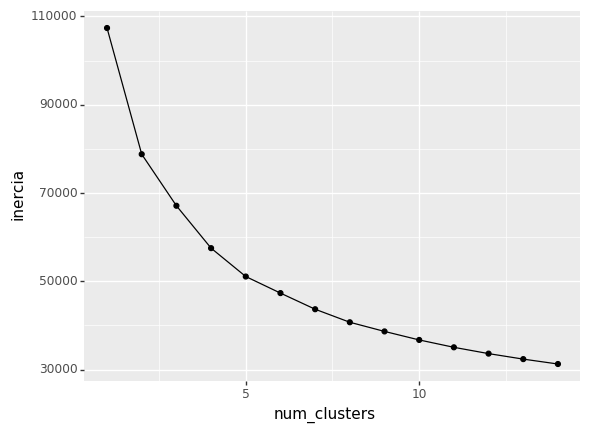

<ggplot: (8784823999976)>

In [11]:
inercia_df
(ggplot(inercia_df, aes("num_clusters", "inercia")) + geom_line() + geom_point())

**Pregunta**: Hay varias soluciones que podemos probar. ¿Qué indica la gráfica de codo?

## 4. Agrupar y perfilar

Calculamos la segmentación y vemos cuántos clientes caen en cada grupo:

In [22]:
agrupador = KMeans(
        n_clusters=5, init='random',
        n_init=10, max_iter=200,
        random_state=1284)
agrupador_ajustado = agrupador.fit(general_esc)
grupos = agrupador_ajustado.predict(general_esc)
conteos = pd.Series(grupos).value_counts()
print(conteos)
prop = conteos / sum(conteos)
prop

4    2287
2    2087
0    1931
1    1853
3     791
dtype: int64


4    0.255559
2    0.233210
0    0.215778
1    0.207062
3    0.088390
dtype: float64

Checa convergencia de solución (si obtienes un valor igual a max_iter, puedes iterar más veces):

In [26]:
agrupador_ajustado.n_iter_

14

Ahora vamos a perfilar en las variables que usamos para segmentar, que están estandarizadas:

In [13]:
def perfilar(general_esc, grupos, tipo = "aditivo"):
    ### producir perfiles aditivos o multiplicativos según grupos
    # convertimos a categoría
    datos = general_esc.copy()
    datos["grupo"] = pd.Series(grupos).astype("category")
    # calculamos medias por grupo de las variables
    agregados = datos.groupby("grupo").mean()
    # pivoteamos las variables a forma larga
    agregados_larga = agregados.reset_index() \
        .melt(id_vars = ["grupo"])
    # ahora calculamos medias totales a lo largo de grupos
    medias = agregados_larga.drop(columns=["grupo"]).groupby("variable").mean() \
        .rename(columns = {"value":"media"})
    # en estas líneas tomamos las medias por grupo y les agregamos
    # la medias a total:
    variable_cat = pd.Categorical(agregados_larga['variable'], 
        categories=agregados.columns.tolist())
    agregados_larga = agregados_larga.assign(variable_cat = variable_cat). \
        merge(medias, on = "variable", how = "left")
    # calculamos el perfil (diferencia vs media)
    if tipo=="aditivo":
        agregados_larga["perfil"] = agregados_larga["value"] - agregados_larga["media"]
    else:
        agregados_larga["perfil"] = 100 * (agregados_larga["value"] / agregados_larga["media"] - 1.0)
    return agregados_larga

agregados_larga = perfilar(general_esc, grupos)
agregados_larga

,grupo,variable,value,variable_cat,media,perfil
0,0,purchases_log,0.386096,purchases_log,-0.009385,0.395481
1,1,purchases_log,0.962411,purchases_log,-0.009385,0.971796
2,2,purchases_log,-1.574405,purchases_log,-0.009385,-1.565020
3,3,purchases_log,-0.232336,purchases_log,-0.009385,-0.222951
4,4,purchases_log,0.411309,purchases_log,-0.009385,0.420694
5,0,oneoff_purchases_log,0.823231,oneoff_purchases_log,0.013241,0.809990
6,1,oneoff_purchases_log,1.191579,oneoff_purchases_log,0.013241,1.178338
7,2,oneoff_purchases_log,-0.959474,oneoff_purchases_log,0.013241,-0.972715
8,3,oneoff_purchases_log,-0.312105,oneoff_purchases_log,0.013241,-0.325346
9,4,oneoff_purchases_log,-0.677026,oneoff_purchases_log,0.013241,-0.690267


In [14]:
# pivoteamos los grupos para obtener una tabla más legible
agregados_larga[['grupo', 'variable_cat', 'value']]. \
    pivot(columns = 'grupo', values='value', index = "variable_cat").round(2)

grupo,0,1,2,3,4
variable_cat,,,,,
purchases_log,0.39,0.96,-1.57,-0.23,0.41
oneoff_purchases_log,0.82,1.19,-0.96,-0.31,-0.68
installments_purchases_log,-0.68,0.91,-1.02,-0.30,0.87
cash_advance_log,0.01,-0.23,0.99,-0.53,-0.54
credit_limit_log,-0.02,0.72,-0.09,-0.25,-0.39
payments_log,0.09,0.68,0.12,-1.70,-0.15
minimum_payments_log,0.21,0.27,0.37,-1.98,-0.05
balance_frequency,0.14,0.42,0.19,-2.25,0.14
purchases_frequency,-0.38,1.06,-1.19,-0.57,0.74


In [15]:
# y usamos formato condicional para leer más facilmente
def color_negative_red(val):
    color = 'red' if val < -0.3 else 'black' if val > 0.3 else 'gray'
    return 'color: %s' % color

def tabla_perfiles(agregados_larga, columna, renglon):
    resumen_perfil = agregados_larga[['grupo', 'variable_cat', 'perfil']]. \
        pivot(columns='grupo', values='perfil', index="variable_cat").round(2). \
        sort_values(by=renglon, axis=1). \
        sort_values(by=columna, axis=0)
    return resumen_perfil.style.applymap(color_negative_red)

tabla_perfiles(agregados_larga, columna = 2, renglon = 'purchases_log')

grupo,2,3,0,4,1
variable_cat,,,,,
purchases_log,-1.57,-0.22,0.4,0.42,0.97
purchases_frequency,-1.12,-0.5,-0.31,0.81,1.13
oneoff_purchases_log,-0.97,-0.33,0.81,-0.69,1.18
installments_purchases_log,-0.97,-0.26,-0.64,0.91,0.96
purchases_installments_frequency,-0.83,-0.39,-0.7,1.02,0.89
oneoff_purchases_frequency,-0.66,-0.41,0.29,-0.57,1.36
prc_full_payment,-0.39,-0.05,-0.29,0.41,0.32
credit_limit_log,-0.09,-0.24,-0.01,-0.39,0.73
payments_log,0.31,-1.51,0.28,0.05,0.87


Estos son perfiles aditivos pero en escala logarítmica estandarizada. Nos dan una idea, pero pueden ser difíciles de interpetar.

### Prueba de permutaciones (optativo pero útil)

Para entender qué tan grandes son estas diferencias, podemos hacer una prueba de permutaciones. Permutamos los grupos y comparamos la variación contra la observada:

In [16]:
agregados_larga_perm = perfilar(general_esc, grupos[np.random.permutation(grupos.size)])
tabla_perfiles(agregados_larga_perm, columna = 2, renglon = 'purchases_log')

grupo,2,1,4,0,3
variable_cat,,,,,
purchases_log,-0.06,-0.03,-0.02,0.04,0.08
oneoff_purchases_log,-0.04,-0.01,-0.01,0.03,0.04
purchases_frequency,-0.04,-0.03,-0.01,0.03,0.05
oneoff_purchases_frequency,-0.04,-0.02,0.01,0.01,0.04
installments_purchases_log,-0.03,-0.05,-0.02,0.05,0.06
credit_limit_log,-0.02,-0.02,0.01,-0.01,0.04
payments_log,-0.02,-0.01,-0.01,0.03,0.01
purchases_installments_frequency,-0.02,-0.02,-0.01,0.03,0.02
minimum_payments_log,-0.01,-0.01,-0.05,-0,0.07


Esta tabla indica que típicamente podemos considerar diferencias de alrededor de +/-0.10 son producidas por la agrupación que construimos.

## 4. Interpretación y nombres de grupos

Podemos perfilar **en las variables originales** que usamos para interpretar y nombrar grupos, pero usamos **diferencias multiplicativas**:

In [17]:
general_vars = list(map(lambda x: x.replace('_log', ''), vars_segmentos))
print(general_vars)
agregados_larga_m = perfilar(general.loc[:, general_vars], grupos, tipo = "mult")
with pd.option_context('display.precision', 3):
    tab = tabla_perfiles(agregados_larga_m.round(0), columna = 2, renglon = 'purchases')
tab

['purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'credit_limit', 'payments', 'minimum_payments', 'balance_frequency', 'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 'prc_full_payment']


grupo,2,3,4,0,1
variable_cat,,,,,
oneoff_purchases,-74,-43,-63,-2,182
purchases,-70,-40,-29,-25,164
oneoff_purchases_frequency,-69,-38,-54,20,141
installments_purchases,-65,-35,21,-58,137
purchases_frequency,-56,-20,29,-17,65
purchases_installments_frequency,-54,-20,53,-49,69
prc_full_payment,-41,-3,33,-32,43
credit_limit,-6,-19,-22,-2,49
payments,1,-51,-28,-7,85


Ahora podemos empezar a nombrar grupos. ¿Qué mejores nombres propondrías?

In [18]:
nombres = {2:'a', 3:'b', 4:'c', 0:'d', 1:'f'}
grupos_nombre = pd.Series(grupos).replace(nombres)
agregados_larga_m['grupo'].replace(nombres, inplace = True)
with pd.option_context('display.precision', 3):
    tab = tabla_perfiles(agregados_larga_m.round(0), 
                         columna = 'a', renglon = 'purchases')
tab

grupo,a,b,c,d,f
variable_cat,,,,,
oneoff_purchases,-74,-43,-63,-2,182
purchases,-70,-40,-29,-25,164
oneoff_purchases_frequency,-69,-38,-54,20,141
installments_purchases,-65,-35,21,-58,137
purchases_frequency,-56,-20,29,-17,65
purchases_installments_frequency,-54,-20,53,-49,69
prc_full_payment,-41,-3,33,-32,43
credit_limit,-6,-19,-22,-2,49
payments,1,-51,-28,-7,85


**Pregunta**: considerarías que algunos grupos son muy similares y valdría la pena usar una solución de menos grupos. ¿Cómo se ve una solución de 4 o 6 grupos?

**Ejercicio**: repite con otro número de grupos, y considera ventajas y desventajas en cuanto a la interpretación.



## Perfilamiento en variables suplementarias

Ahora perfilamos usando otras variables que no usamos en la segmentación. 

In [19]:
suplementarias = ['balance', 'tenure']
agregados_larga_m = perfilar(general.loc[:, suplementarias], grupos_nombre, tipo = "mult")
with pd.option_context('display.precision', 5):
    tab = tabla_perfiles(agregados_larga_m.round(2), columna = "a", renglon = 'tenure')
tab

grupo,b,c,a,d,f
variable_cat,,,,,
tenure,-1.23,-0.74,-0.36,-0.02,2.35
balance,-55.54,-28.13,35.75,10.36,37.55


In [20]:
usuarios_n = grupos_nombre.value_counts()
usuarios_n

c    2287
a    2087
d    1931
f    1853
b     791
dtype: int64

In [21]:
usuarios_pct = 100*usuarios_n/sum(usuarios_n)
usuarios_pct.round(1)

c    25.6
a    23.3
d    21.6
f    20.7
b     8.8
dtype: float64

Este resultado no es muy útil